In [1]:
from pathlib import Path
import time
import json
import geopandas as gpd
import pandas as pd
from shapely.geometry import box
import matplotlib.pyplot as plt
import contextily as cx

import nomad.map_utils as nm
from nomad.city_gen import RasterCity
from nomad.traj_gen import Population
from nomad.io.base import from_file
from tqdm import tqdm

OUTPUT_DIR = Path("output")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
BOX_NAME = 'medium'

config = {
    "box_name": BOX_NAME,
    "block_side_length": 15.0,
    "hub_size": 100,
    "N": 200,
    "name_seed": 42,
    "name_count": 2,
    "epr_params": {
        "datetime": "2025-05-23 00:00-05:00",
        "end_time": "2025-07-01 00:00-05:00",
        "epr_time_res": 15,
        "rho": 0.4,
        "gamma": 0.3,
        "seed_base": 100
    },
    "traj_params": {
        "dt": 0.5,
        "seed_base": 200
    },
    "sampling_params": {
        "beta_ping": 7,
        "beta_start": 300,
        "beta_durations": 55,
        "ha": 11.5/15,
        "seed_base": 1
    }
}


VISUALIZATION
Loaded 239,023 sparse trajectory points for 200 agents
Saved plot to output/sparse_trajectories_medium.png


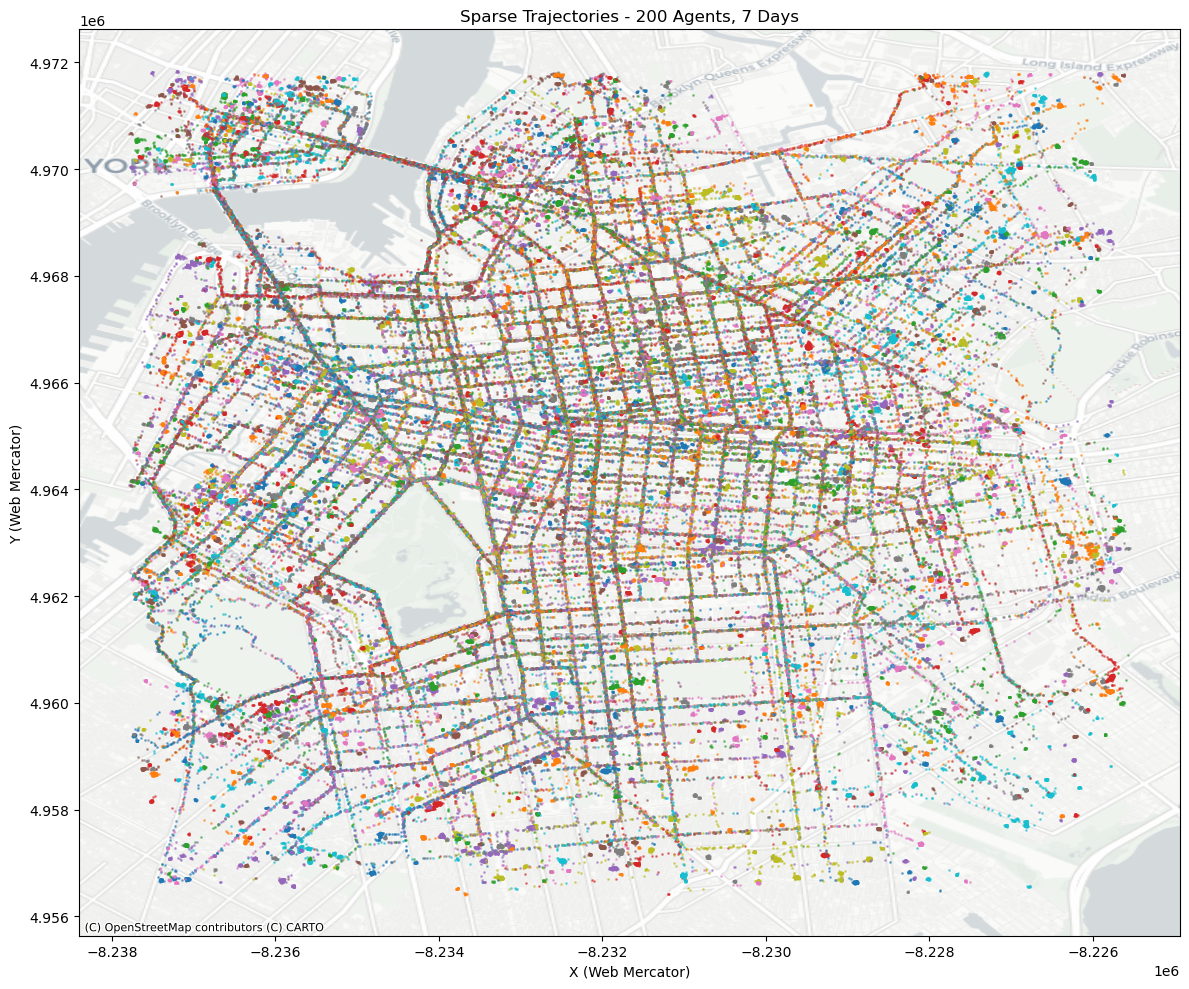

In [2]:
print("\n" + "="*50)
print("VISUALIZATION")
print("="*50)

# Read sparse trajectories
sparse_traj_df = from_file(OUTPUT_DIR / f"sparse_traj_{BOX_NAME}", format="parquet")
print(f"Loaded {len(sparse_traj_df):,} sparse trajectory points for {config['N']} agents")

# Plot with contextily basemap
fig, ax = plt.subplots(figsize=(12, 10))

# Plot each agent with different color
for agent_id in sparse_traj_df['user_id'].unique():
    agent_traj = sparse_traj_df[sparse_traj_df['user_id'] == agent_id]
    ax.scatter(agent_traj['x'], agent_traj['y'], s=1, alpha=0.5, label=agent_id)

# Add basemap
cx.add_basemap(ax, crs="EPSG:3857", source=cx.providers.CartoDB.Positron)

ax.set_xlabel('X (Web Mercator)')
ax.set_ylabel('Y (Web Mercator)')
ax.set_title(f'Sparse Trajectories - {config["N"]} Agents, 7 Days')
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=10)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / f"sparse_trajectories_{BOX_NAME}.png", dpi=150, bbox_inches='tight')
print(f"Saved plot to {OUTPUT_DIR / f'sparse_trajectories_{BOX_NAME}.png'}")
plt.show()

In [3]:
sparse_traj_df.to_parquet(OUTPUT_DIR / f'sparse_trajectories_{BOX_NAME}.parquet')